# Pandas exercise

1 - Plot an histogram of the balance amount for all the customers.

2 - Plot the mean and median balance, grouped by year and month of activated_date.



3 - Report in a table the following information for customers who activated their account and
made their last payment during 2020: cust_id (excluding letters), activated_date (in format
YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a
calculated field of cash_advance as a percentage of credit_limit.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
cc_data = pd.read_csv("../data/dataset.csv", index_col=0)
cc_data.head()

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1,C10001,10/6/2019,9/9/2020,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
2,C10002,10/6/2019,7/4/2020,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
3,C10003,10/6/2019,9/17/2020,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,C10004,10/6/2019,8/24/2020,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
5,C10005,10/6/2019,10/20/2020,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [9]:
records, fields = cc_data.shape
print(f"Credit Card dataset has {records} records and {fields} fields.")

Credit Card dataset has 8950 records and 21 fields.


In [12]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 1 to 8950
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_a

In [13]:
cc_data.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


# CC Balance

In [15]:
cc_data[cc_data["balance"].isna()]

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
2492,C12565,12/27/2019,8/29/2020,NaN,1.0,291.62,0.00,291.62,1461.717523,1.0,...,0.857143,0.142857,4,7,1500.0,276.342352,849.320880,0.0,7,0
3436,C13532,1/28/2020,8/14/2020,NaN,1.0,1711.11,537.42,1173.69,0.000000,1.0,...,1.000000,0.000000,0,51,4000.0,1581.285232,189.328101,0.0,12,0


## Question 1

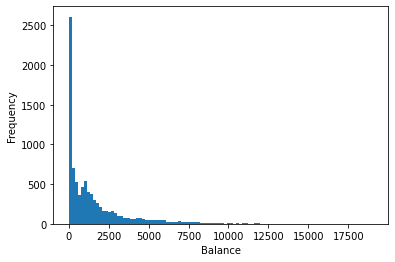

In [21]:
fig, ax = plt.subplots()
cc_data.plot(kind="hist", y="balance", ax=ax, bins=100, legend=False)
ax.set_xlabel("Balance")

plt.show()

## Question 2 

In [22]:
# Date fields to pandas datetime
cc_data[['activated_date', 'last_payment_date']] = cc_data[['activated_date', 'last_payment_date']].apply(pd.to_datetime, yearfirst=True)

In [44]:
year_series = cc_data['activated_date'].dt.year.astype('Int64')
month_series = cc_data['activated_date'].dt.month.astype('Int64')

grouped_data = cc_data.groupby([year_series, month_series])['balance'].agg(['mean','median'])

grouped_data.index = [f"{year}-{month}" for year,month in grouped_data.index.to_flat_index()]
grouped_data.index = pd.to_datetime(grouped_data.index, format="%Y-%m").strftime("%Y-%b")

grouped_data

,mean,median
2019-Oct,2482.234166,1524.409377
2019-Nov,1848.704323,1082.071173
2019-Dec,2018.788906,1162.588384
2020-Jan,1854.535889,1175.749847
2020-Feb,1747.350977,994.841733
2020-Mar,1554.973023,828.954823
2020-Apr,1483.183191,910.141912
2020-May,1214.333732,734.557681
2020-Jun,939.997996,472.791862
2020-Jul,649.717622,221.291290


<AxesSubplot: >

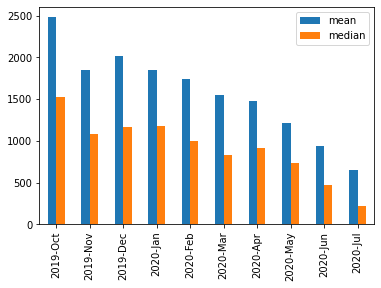

In [45]:
grouped_data.plot(kind="bar")

## Question 3   
- Report in a table the following information for customers who activated their account and
made their last payment during 2020: cust_id (excluding letters), activated_date (in format
YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a
calculated field of cash_advance as a percentage of credit_limit.

In [50]:
cc_data.columns

Index(['cust_id', 'activated_date', 'last_payment_date', 'balance',
       'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

In [55]:
cc_data_mod = cc_data.copy()

In [56]:
remove_letters = lambda string: ''.join(filter(str.isdigit, string))
cc_data_mod["cust_id"] = cc_data_mod["cust_id"].apply(remove_letters)

In [59]:
cc_data_mod["activated_date"] = cc_data_mod["activated_date"].dt.strftime("%Y-%m")

In [66]:
cc_data_mod["credit_limit_percent"] = round(cc_data_mod["cash_advance"] / cc_data_mod["credit_limit"] * 100, 2)

In [77]:
mask_2020 = cc_data_mod["last_payment_date"].dt.year == 2020
cc_data_mod_subset = cc_data_mod[['cust_id', "activated_date", "cash_advance", "credit_limit", "credit_limit_percent"]]
#cc_data_mod.loc[:,['cust_id', "activated_date", "cash_advance", "credit_limit", "credit_limit_percent"]]
cc_data_mod_subset[mask_2020].head()

,cust_id,activated_date,cash_advance,credit_limit,credit_limit_percent
1,10001,2019-10,0.000000,1000.0,0.00
2,10002,2019-10,6442.945483,7000.0,92.04
3,10003,2019-10,0.000000,7500.0,0.00
4,10004,2019-10,205.788017,7500.0,2.74
5,10005,2019-10,0.000000,1200.0,0.00


# Database

In [81]:
! pip install sqlalchemy

In [82]:
import sqlalchemy as db
from sqlalchemy import create_engine, MetaData, Table, select, update

# Numpy

In [83]:
import numpy as np

In [85]:
array = np.arange(20)

In [86]:
array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [103]:
begin = 0
stop = 10
step = 3
array[begin::step]

5

In [119]:
array_3D = np.zeros((2,3, 2))



In [117]:
array_2D[0][1:2]

array([0.])

In [127]:
array_3D

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [128]:
array_3D[1][0][1] = 1

In [129]:
array_3D

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 1.],
        [0., 0.],
        [0., 0.]]])

In [131]:
! pip install scikit-image


In [132]:
from skimage import io

In [136]:
image = io.imread("../data/th.jfif")
type(image)

numpy.ndarray

In [138]:
image.shape

(159, 283, 3)

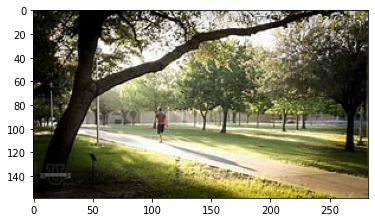

In [142]:
plt.imshow(image)

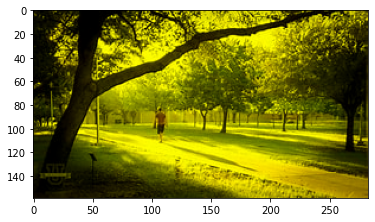

In [164]:
image[:,:,2] = np.zeros([image.shape[0], image.shape[1]])
plt.imshow(image)